# FinOL
## Tutorial 1: The Data Layer
In this tutorial, we will explore the concept of the data layer in FinOL (Financial Online), a financial data analysis platform. The data layer is a fundamental component that handles the retrieval and management of financial data for analysis.

The following steps will be covered:

**Step 1:** Here we will obtain and load historical OHLCV data for a stock from Yahoo Finance. We will download data for Alcoa Corporation (AA) during 2023 using the ``yfinance`` library and save it in a Pandas DataFrame.

**Step 2:** In this step, we will explore some basic financial analysis that can be done using the loaded stock data.  We will calculate all features provided by ``FinOL``.

**Step 3:** The final step will focus on visualization. We will plot the time series see trends and patterns in movements over time. We will also plot the features we calculated in Step 2, like overlap features, momentum features, etc., to analyze the behavior over time.

To get started, we first import ``data_loader`` from the ``FinOL`` package and configure the environment for Tutorial 1:

In [1]:
import re
from finol.data_layer.data_loader import *
from finol.config import *

with open(ROOT_PATH + '/config.py', 'r') as file:
    content = file.read()

content = re.sub(r'(TUTORIAL_MODE\s*=\s*).*', r'\g<1>True', content)
content = re.sub(r'(TUTORIAL_NAME\s*=\s*").*?(")', r'\g<1>' + "TUTORIAL_1" + r'\g<2>', content)

with open(ROOT_PATH + '/config.py', 'w') as file:
    file.write(content)

## Step 1: Obtaining OHLCV Data
We will start by getting the OHLCV data for a specific asset (e.g., AA) from January 1, 2023, to December 31, 2023 for use throughout the tutorial.  We will be using the ``yfinance`` library to fetch the data from Yahoo Finance:


In [2]:
!pip install yfinance

In [3]:
import yfinance

asset_code = 'AA'
start_date = '2023-01-01'
end_date = '2024-01-01'

df = yfinance.download(asset_code, start=start_date, end=end_date)
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
df.columns = ['OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME']
df

[*********************100%%**********************]  1 of 1 completed


,OPEN,HIGH,LOW,CLOSE,VOLUME
Date,,,,,
2023-01-03,45.770000,46.669998,44.439999,44.580002,2880000
2023-01-04,44.770000,45.900002,44.370998,45.130001,3523400
2023-01-05,45.299999,45.990002,44.139999,45.490002,3835700
2023-01-06,46.520000,47.740002,45.680000,46.360001,4645200
2023-01-09,47.590000,50.650002,47.490002,50.270000,6175600
...,...,...,...,...,...
2023-12-22,32.959999,34.439999,32.880001,33.770000,9064600
2023-12-26,33.860001,34.119999,33.500000,33.869999,4505900
2023-12-27,34.230000,35.035000,33.750000,34.810001,5798100


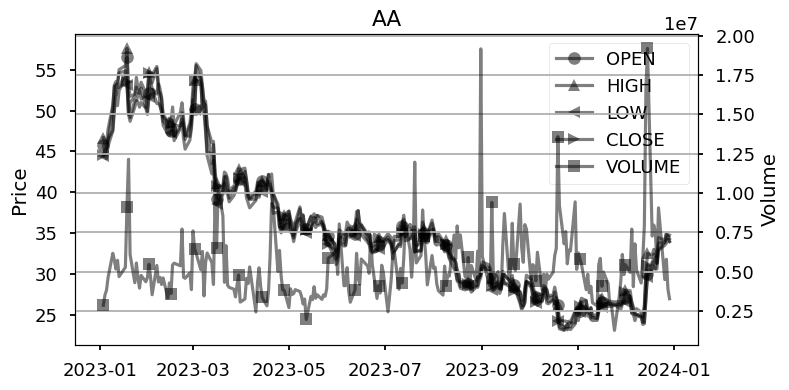

In [4]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(8, 4))

# plot 'OPEN', 'HIGH', 'LOW', 'CLOSE' on the first axis
ax1.plot(df['OPEN'], color='black', marker='o', markevery=MARKEVERY,  alpha=ALPHA, label='OPEN')
ax1.plot(df['HIGH'], color='black', marker='^', markevery=MARKEVERY,  alpha=ALPHA, label='HIGH')
ax1.plot(df['LOW'],  color='black', marker='<', markevery=MARKEVERY,  alpha=ALPHA, label='LOW')
ax1.plot(df['CLOSE'],color='black', marker='>', markevery=MARKEVERY,  alpha=ALPHA, label='CLOSE')
ax1.set_ylabel('Price')
ax1.set_title(asset_code)

# plot 'VOLUME' on the second axis
ax2 = ax1.twinx()
ax2.plot(df['VOLUME'], color='black', marker='s', markevery=MARKEVERY,  alpha=ALPHA, label='VOLUME')
ax2.set_ylabel('Volume')

lines = ax1.get_lines() + ax2.get_lines()
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
df = df.reset_index()
df.columns = ['DATE', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME']
df

,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME
0,2023-01-03,45.770000,46.669998,44.439999,44.580002,2880000
1,2023-01-04,44.770000,45.900002,44.370998,45.130001,3523400
2,2023-01-05,45.299999,45.990002,44.139999,45.490002,3835700
3,2023-01-06,46.520000,47.740002,45.680000,46.360001,4645200
4,2023-01-09,47.590000,50.650002,47.490002,50.270000,6175600
...,...,...,...,...,...,...
245,2023-12-22,32.959999,34.439999,32.880001,33.770000,9064600
246,2023-12-26,33.860001,34.119999,33.500000,33.869999,4505900
247,2023-12-27,34.230000,35.035000,33.750000,34.810001,5798100
248,2023-12-28,34.680000,34.812000,34.198002,34.549999,3909900


## Step 2 and 3: Exploring the Data Layer and Visualization
This completes the introduction and setup for the tutorial. In this step, we will dive into each step in detail and explore the functionalities of the data layer in FinOL, inculding:

* ``feature_engineering``
* ``data_augmentation``
* ``data_cleaning``
* ``data_normalization``
* ``data_splitting``
* ``load_dataset``

**FinOL provides very powerful feature engineering functions, the current version supports up to 140+ technical features, including:**

* **Basic OHLCV Features:** OPEN, High Price HIGH, LOW, CLOSE, and VOLUME.
* **Overlap Features:** Bollinger Bands, Double Exponential Moving Average, Exponential Moving Average, etc.
* **Momentum Features:** Average Directional Movement Index, Average Directional Movement Index Rating, Absolute Price Oscillator, Aroon Up, Aroon Down, etc.
* **Volume Features:** Chaikin A/D Line, Chaikin A/D Oscillator, and On Balance Volume.
* **Cycle Features:** Hilbert Transform - Dominant Cycle Period, Hilbert Transform - Dominant Cycle Phase, Hilbert Transform - Phasor Components, Hilbert Transform - SineWave, etc.
* **Price Features:** Average Price, Median Price, Typical Price, and Weighted Close Price.
* **Volatility Features:** Average True Range, Normalized Average True Range, and True Range.
* **Pattern Features:** Two Crows, 	Three Black Crows, 	Three Inside Up/Down, Three-Line Strike, Three Outside Up/Down, etc.

These features can be used to identify patterns and trends in financial data, and to generate trading signals. ``FinOL``'s feature engineering functions are designed to be flexible and easy to use, allowing users to quickly and easily create custom feature sets for their analysis via `config.py`.

To use ``FinOL``'s feature engineering functions, simply declare whether a particular type of feature is required. ``FinOL`` will automatically calculate the feature values and add them to the dataframe.

Here is an example of how to use ``FinOL``'s feature engineering functions to calculate all features, first open `config.py` and set:

```python
FEATURE_ENGINEERING_CONFIG = {
    "INCLUDE_OHLCV_FEATURES": True,
    "INCLUDE_OVERLAP_FEATURES": True,
    "INCLUDE_MOMENTUM_FEATURES": True,
    "INCLUDE_VOLUME_FEATURES": True,
    "INCLUDE_CYCLE_FEATURES": True,
    "INCLUDE_PRICE_FEATURES": True,
    "INCLUDE_VOLATILITY_FEATURES": True,
    "INCLUDE_PATTERN_FEATURES": True
}
```

then

```python
df_feature = feature_engineering(df)
```

This code will calculate all features for the AA stock and store the results in a bigger dataframe.

In [6]:
df_feature = feature_engineering(df)
df_feature

,OPEN,HIGH,LOW,CLOSE,VOLUME,BBANDS_UPPER,BBANDS_MIDDLE,BBANDS_LOWER,DEMA,EMA,...,CDLSPINNINGTOP,CDLSTALLEDPATTERN,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS
DATE,,,,,,,,,,,,,,,,,,,,,
2023-01-03,45.770000,46.669998,44.439999,44.580002,2880000,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2023-01-04,44.770000,45.900002,44.370998,45.130001,3523400,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2023-01-05,45.299999,45.990002,44.139999,45.490002,3835700,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2023-01-06,46.520000,47.740002,45.680000,46.360001,4645200,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2023-01-09,47.590000,50.650002,47.490002,50.270000,6175600,50.437965,46.366001,42.294037,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,32.959999,34.439999,32.880001,33.770000,9064600,34.283608,31.876000,29.468392,29.348760,27.981257,...,0,0,0,0,0,0,0,0,0,0
2023-12-26,33.860001,34.119999,33.500000,33.869999,4505900,34.935731,32.546000,30.156268,29.995860,28.361175,...,100,0,0,0,0,0,0,0,0,0
2023-12-27,34.230000,35.035000,33.750000,34.810001,5798100,36.004728,33.024000,30.043272,30.695661,28.777229,...,0,0,0,0,0,0,0,0,0,0


One may also notice that the df_feature contains NaN values.  This is because some of the features cannot be calculated for all data points.

To handle missing data, we can use ``FinOL``'s ``data_cleaning`` function.

In [7]:
df_cleaned = data_cleaning(df_feature)
df_cleaned

,OPEN,HIGH,LOW,CLOSE,VOLUME,BBANDS_UPPER,BBANDS_MIDDLE,BBANDS_LOWER,DEMA,EMA,...,CDLSPINNINGTOP,CDLSTALLEDPATTERN,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS
DATE,,,,,,,,,,,,,,,,,,,,,
2023-05-10,37.139999,37.220001,35.380001,36.139999,2961200,37.696819,36.000,34.303181,35.280660,38.579207,...,0,0,0,0,0,0,0,0,0,0
2023-05-11,35.400002,35.930000,35.060001,35.330002,3272400,37.187194,36.190,35.192806,35.087741,38.369580,...,-100,0,0,0,0,0,0,0,0,0
2023-05-12,35.439999,35.500000,35.029999,35.369999,1978200,37.231369,36.034,34.836630,34.924915,38.176059,...,0,0,0,100,0,0,0,0,0,0
2023-05-15,35.505001,37.080002,35.369999,36.990002,3438900,37.358730,36.068,34.777270,34.986564,38.099539,...,0,0,0,0,0,0,0,0,0,0
2023-05-16,36.490002,37.029999,36.025002,36.099998,3234200,37.204038,35.986,34.767962,34.937718,37.970537,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,32.959999,34.439999,32.880001,33.770000,9064600,34.283608,31.876,29.468392,29.348760,27.981257,...,0,0,0,0,0,0,0,0,0,0
2023-12-26,33.860001,34.119999,33.500000,33.869999,4505900,34.935731,32.546,30.156268,29.995860,28.361175,...,100,0,0,0,0,0,0,0,0,0
2023-12-27,34.230000,35.035000,33.750000,34.810001,5798100,36.004728,33.024,30.043272,30.695661,28.777229,...,0,0,0,0,0,0,0,0,0,0


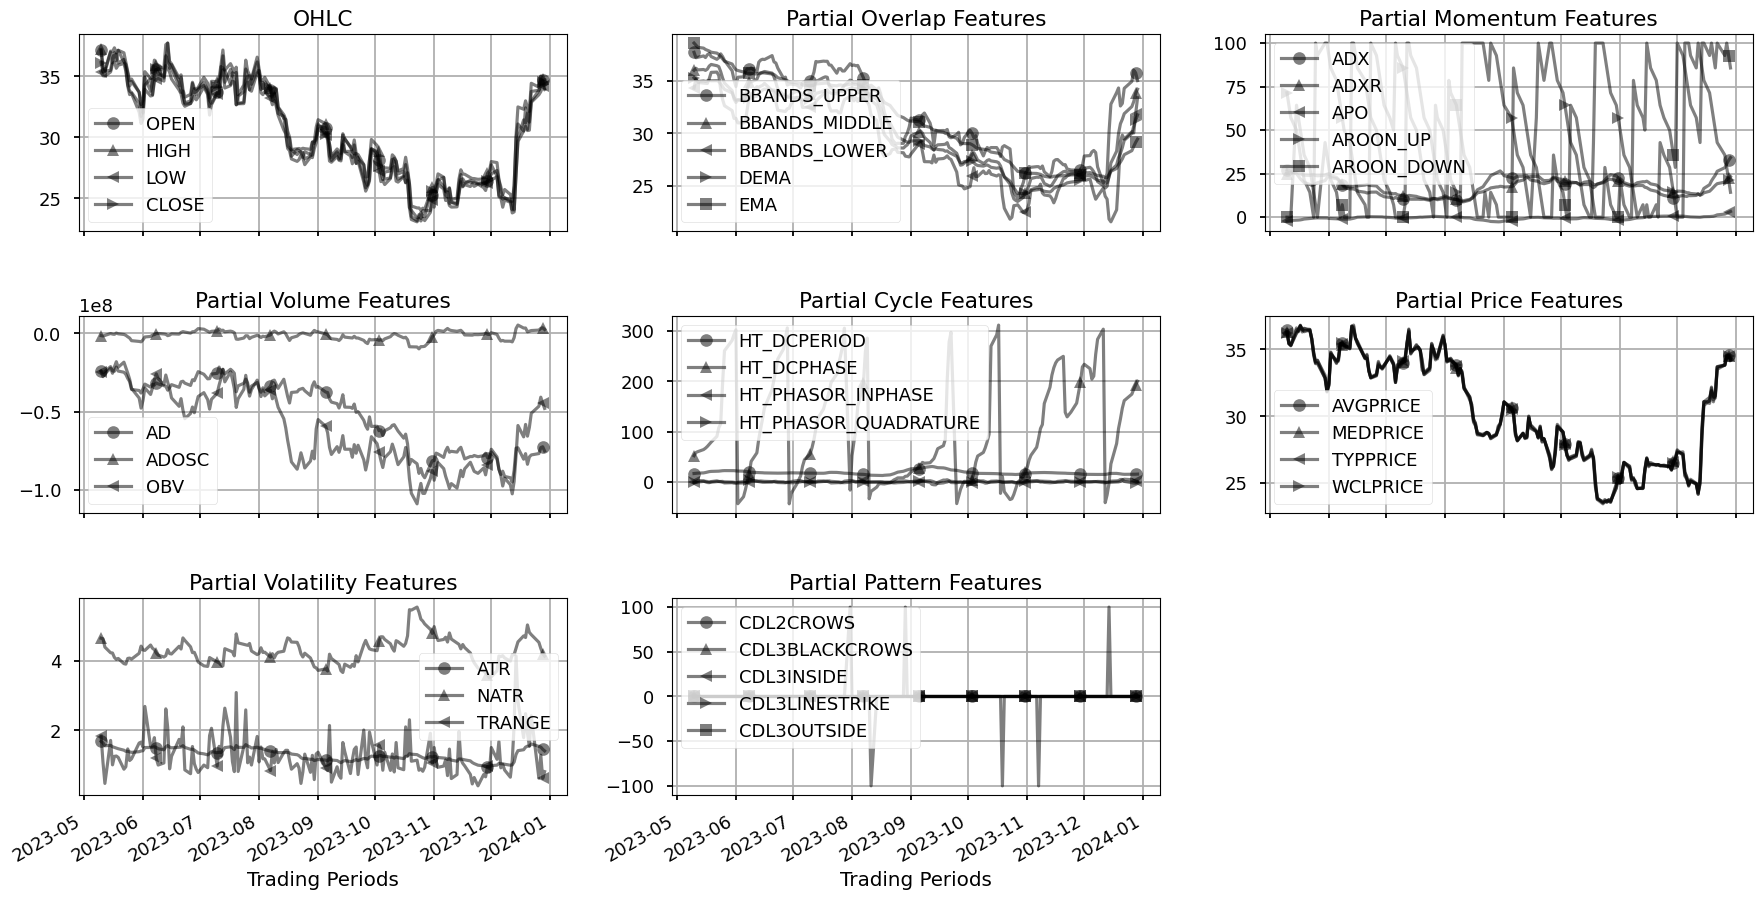

In [8]:
import matplotlib.pyplot as plt

def plot_features(axs, features, title, plot_data):
    for i, m in enumerate(features):
        axs.plot(plot_data[m], marker=MARKERS[i], color='black', markevery=MARKEVERY * 2, alpha=ALPHA)
    axs.set_title(title)
    axs.legend(features, loc='best')
    axs.grid(True)
    axs.set_xlabel('Trading Periods')


fig, axs = plt.subplots(3, 3, figsize=(18, 10))

# plot the subplot of OHLC
OHLC = ['OPEN', 'HIGH', 'LOW', 'CLOSE']
plot_features(axs[0, 0], OHLC, 'OHLC', df_cleaned[OHLC])

# plot the subplot of partial_overlap_features
partial_overlap_features = ['BBANDS_UPPER', 'BBANDS_MIDDLE', 'BBANDS_LOWER', 'DEMA', 'EMA']
plot_features(axs[0, 1], partial_overlap_features, 'Partial Overlap Features', df_cleaned[partial_overlap_features])

# plot the subplot of partial_momentum_features
partial_momentum_features = ['ADX', 'ADXR', 'APO', 'AROON_UP', 'AROON_DOWN']
plot_features(axs[0, 2], partial_momentum_features, 'Partial Momentum Features', df_cleaned[partial_momentum_features])

# plot the subplot of partial_volume_features
partial_volume_features = ['AD', 'ADOSC', 'OBV']
plot_features(axs[1, 0], partial_volume_features, 'Partial Volume Features', df_cleaned[partial_volume_features])

# plot the subplot of partial_cycle_features
partial_cycle_features = ['HT_DCPERIOD', 'HT_DCPHASE', 'HT_PHASOR_INPHASE', 'HT_PHASOR_QUADRATURE']
plot_features(axs[1, 1], partial_cycle_features, 'Partial Cycle Features', df_cleaned[partial_cycle_features])

# plot the subplot of partial_price_features
partial_price_features = ['AVGPRICE', 'MEDPRICE', 'TYPPRICE', 'WCLPRICE']
plot_features(axs[1, 2], partial_price_features, 'Partial Price Features', df_cleaned[partial_price_features])

# plot the subplot of partial_volatility_features
partial_volatility_features = ['ATR', 'NATR', 'TRANGE']
plot_features(axs[2, 0], partial_volatility_features, 'Partial Volatility Features', df_cleaned[partial_volatility_features])

# plot the subplot of partial_pattern_features
partial_pattern_features = ['CDL2CROWS', 'CDL3BLACKCROWS', 'CDL3INSIDE', 'CDL3LINESTRIKE', 'CDL3OUTSIDE']
plot_features(axs[2, 1], partial_pattern_features, 'Partial Pattern Features', df_cleaned[partial_pattern_features])

plt.tight_layout()
fig.autofmt_xdate()
fig.delaxes(axs[2, 2])
plt.show()

To improve the robustness of the model, we can use data augmentation techniques to generate new data points from the existing data.  ``FinOL`` provides a ``data_augmentation`` function that can be used to generate new data points by applying different transformations to the existing data.

In this case, we will use the ``data_augmentation`` function to generate new data points by shifting the data points in the ``df_cleaned`` DataFrame. This will help to create a more diverse dataset and improve the model's ability to generalize to new data.

**Note:** The ``data_augmentation`` function can also be used to apply other types of transformations to the data, such as adding noise or flipping the data.  For more information on the ``data_augmentation`` function, please refer to the ``FinOL`` documentation.

In [9]:
df_augmented, WINDOW_SIZE = data_augmentation(df_cleaned)
print(f'WINDOW_SIZE: {WINDOW_SIZE}')
df_cleaned = data_cleaning(df_augmented)
df_cleaned

WINDOW_SIZE: 10

,OPEN,HIGH,LOW,CLOSE,VOLUME,BBANDS_UPPER,BBANDS_MIDDLE,BBANDS_LOWER,DEMA,EMA,...,prev_9_CDLSPINNINGTOP,prev_9_CDLSTALLEDPATTERN,prev_9_CDLSTICKSANDWICH,prev_9_CDLTAKURI,prev_9_CDLTASUKIGAP,prev_9_CDLTHRUSTING,prev_9_CDLTRISTAR,prev_9_CDLUNIQUE3RIVER,prev_9_CDLUPSIDEGAP2CROWS,prev_9_CDLXSIDEGAP3METHODS
DATE,,,,,,,,,,,,,,,,,,,,,
2023-05-23,36.000000,36.169998,35.450001,35.669998,3542500,37.188240,36.344000,35.499760,34.933540,37.499619,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-05-24,35.259998,35.360001,34.205002,34.349998,3450700,37.555432,35.866000,34.176567,34.705801,37.296418,...,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-05-25,34.209999,34.639999,33.509998,33.790001,3906500,37.294196,35.262000,33.229803,34.435091,37.070198,...,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-05-26,34.590000,34.790001,33.610001,33.689999,5876800,36.928414,34.780000,32.631585,34.183013,36.852120,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-05-30,33.705002,33.705002,32.070000,32.799999,6159500,35.951791,34.059999,32.168207,33.849225,36.590693,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,32.959999,34.439999,32.880001,33.770000,9064600,34.283608,31.876000,29.468392,29.348760,27.981257,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-12-26,33.860001,34.119999,33.500000,33.869999,4505900,34.935731,32.546000,30.156268,29.995860,28.361175,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-12-27,34.230000,35.035000,33.750000,34.810001,5798100,36.004728,33.024000,30.043272,30.695661,28.777229,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


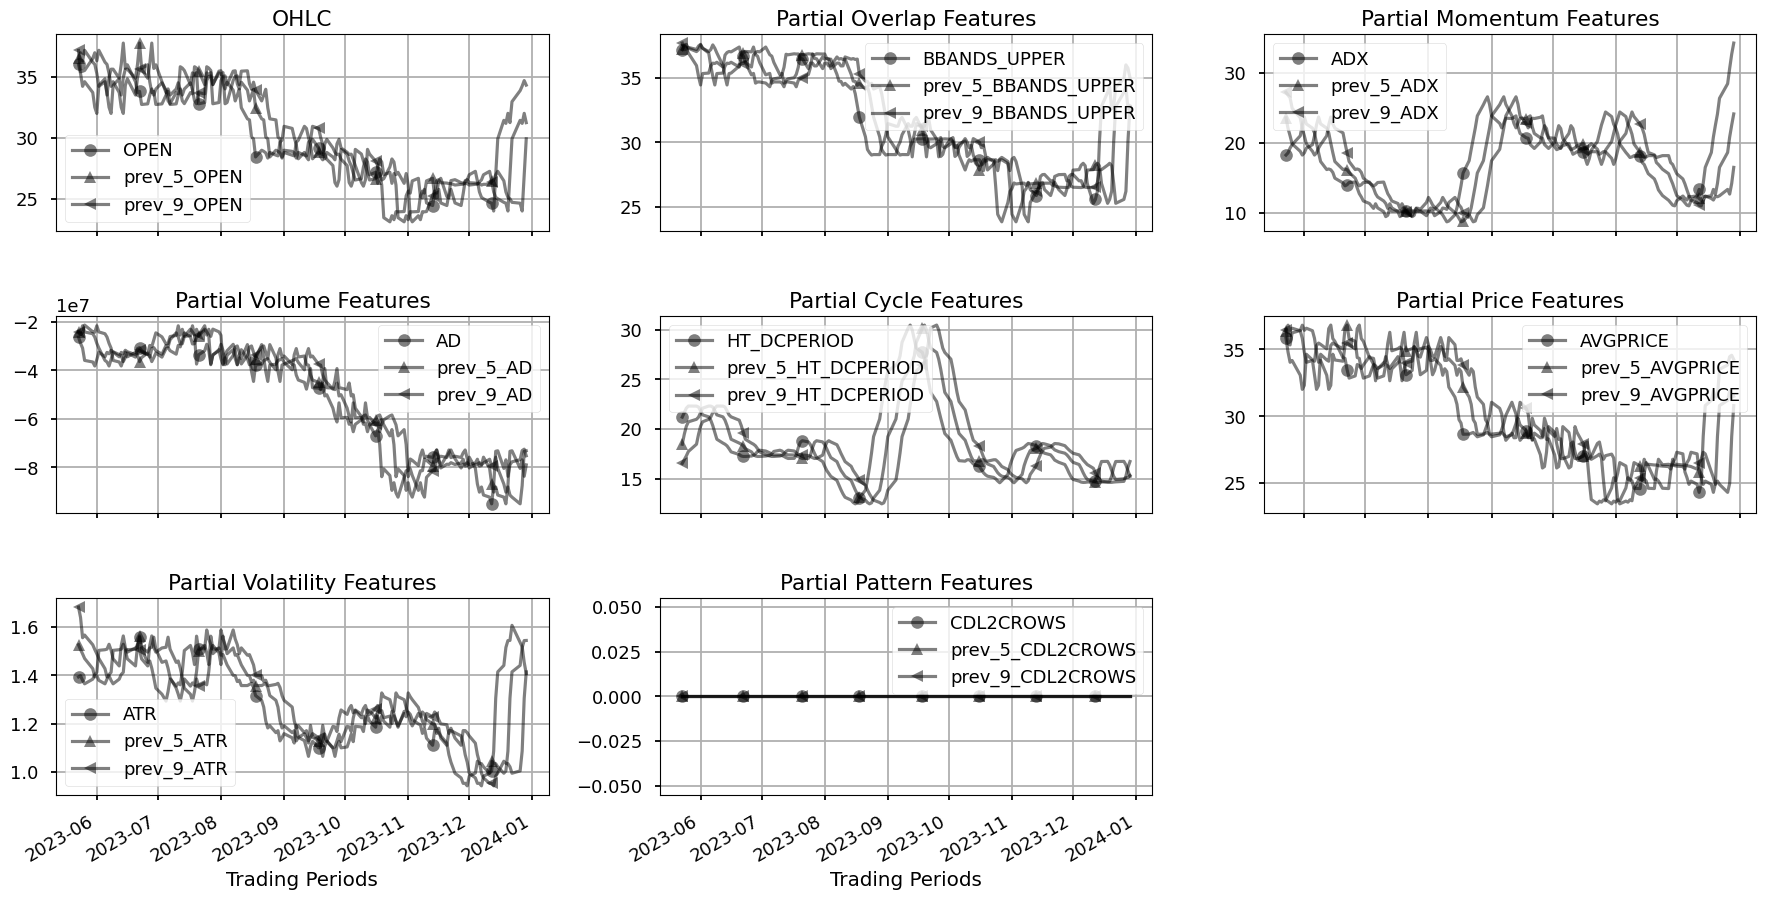

In [10]:
# Create a figure and subplots
fig, axs = plt.subplots(3, 3, figsize=(18, 10))

# plot the subplot of OHLC
OHLC = ['OPEN', 'prev_5_OPEN', 'prev_9_OPEN']
plot_features(axs[0, 0], OHLC, 'OHLC', df_cleaned[OHLC])

# plot the subplot of partial_overlap_features
partial_overlap_features = ['BBANDS_UPPER', 'prev_5_BBANDS_UPPER', 'prev_9_BBANDS_UPPER']
plot_features(axs[0, 1], partial_overlap_features, 'Partial Overlap Features', df_cleaned[partial_overlap_features])

# plot the subplot of partial_momentum_features
partial_momentum_features = ['ADX', 'prev_5_ADX', 'prev_9_ADX']
plot_features(axs[0, 2], partial_momentum_features, 'Partial Momentum Features', df_cleaned[partial_momentum_features])

# plot the subplot of partial_volume_features
partial_volume_features = ['AD', 'prev_5_AD', 'prev_9_AD']
plot_features(axs[1, 0], partial_volume_features, 'Partial Volume Features', df_cleaned[partial_volume_features])

# plot the subplot of partial_cycle_features
partial_cycle_features = ['HT_DCPERIOD', 'prev_5_HT_DCPERIOD', 'prev_9_HT_DCPERIOD']
plot_features(axs[1, 1], partial_cycle_features, 'Partial Cycle Features', df_cleaned[partial_cycle_features])

# plot the subplot of partial_price_features
partial_price_features = ['AVGPRICE', 'prev_5_AVGPRICE', 'prev_9_AVGPRICE']
plot_features(axs[1, 2], partial_price_features, 'Partial Price Features', df_cleaned[partial_price_features])

# plot the subplot of partial_volatility_features
partial_volatility_features = ['ATR', 'prev_5_ATR', 'prev_9_ATR']
plot_features(axs[2, 0], partial_volatility_features, 'Partial Volatility Features', df_cleaned[partial_volatility_features])

# plot the subplot of partial_pattern_features
partial_pattern_features = ['CDL2CROWS', 'prev_5_CDL2CROWS', 'prev_9_CDL2CROWS']
plot_features(axs[2, 1], partial_pattern_features, 'Partial Pattern Features', df_cleaned[partial_pattern_features])

plt.tight_layout()
fig.autofmt_xdate()
fig.delaxes(axs[2, 2])
plt.show()

To train a data-driven machine learning model, we need to have a target label for each data point.

In data-driven OLPS problems, the most common target label is the price relative. The price relative is the ratio of the current price to the previous price. It can be used to measure the performance of an asset over time.

In this tutorial, we will use the price relative as the target label for our portfolio optimization problem. But it is important to note that the target label can be customized to meet the specific needs of the user.

In [11]:
df_label = pd.DataFrame({'LABEL': df_cleaned['CLOSE'].shift(-1) / df_cleaned['CLOSE']})
df_label.iloc[-1, -1] = 1

**Data Splitting and Normalization**

Once we have created the target labels, we need to split the data into training, validation, and test sets.

``data_splitting`` function will split the data into training, validation, and test sets.  The training set will be used to train the machine learning model.  The validation set will be used to evaluate the performance of the model during training.  The test set will be used to evaluate the performance of the model after training.

The ``data_normalization`` function will normalize the data.  This will help to stabilize the training process. Also, ``FinOL`` provides a variety of data normalization methods to choose from. The available methods are:

* **Standard scaling**.
* **Min-Max scaling**.
* **Max-Abs scaling**.
* **Robust scaling**.

To explore different scaling methods, the user can modify the corresponding configuration below in the ``config.py``:

```python
SCALER = "MinMaxScaler"
```

In [12]:
train, val, test = data_splitting(df_cleaned)
train_label, val_label, test_label = data_splitting(df_label)

zscore_train = zscore_calculation(train)
train_normalization = data_normalization(train, zscore_train)
val_normalization = data_normalization(val, zscore_train)
test_normalization = data_normalization(test, zscore_train)

In [13]:
train_normalization

,OPEN,HIGH,LOW,CLOSE,VOLUME,BBANDS_UPPER,BBANDS_MIDDLE,BBANDS_LOWER,DEMA,EMA,...,prev_9_CDLSPINNINGTOP,prev_9_CDLSTALLEDPATTERN,prev_9_CDLSTICKSANDWICH,prev_9_CDLTAKURI,prev_9_CDLTASUKIGAP,prev_9_CDLTHRUSTING,prev_9_CDLTRISTAR,prev_9_CDLUNIQUE3RIVER,prev_9_CDLUPSIDEGAP2CROWS,prev_9_CDLXSIDEGAP3METHODS
DATE,,,,,,,,,,,,,,,,,,,,,
2023-05-23,0.814499,0.820366,0.945880,0.878394,0.113838,0.956964,1.000000,1.000000,1.000000,1.000000,...,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2023-05-24,0.735607,0.727689,0.792743,0.722550,0.104176,1.000000,0.938195,0.827877,0.960438,0.967435,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2023-05-25,0.623667,0.645309,0.707257,0.656435,0.152149,0.969382,0.860098,0.704720,0.913412,0.931181,...,0.5,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2023-05-26,0.664179,0.662471,0.719557,0.644628,0.359523,0.926511,0.797776,0.626903,0.869622,0.896232,...,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2023-05-30,0.569829,0.538330,0.530135,0.539551,0.389277,0.812047,0.704680,0.566626,0.811638,0.854336,...,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-24,0.000000,0.012586,0.067651,0.061393,0.196670,0.000000,0.021981,0.094231,0.139723,0.110784,...,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2023-08-25,0.049040,0.008581,0.000000,0.000000,0.309161,0.004508,0.002845,0.050724,0.081083,0.072312,...,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2023-08-28,0.025586,0.002288,0.076261,0.029516,0.210142,0.003953,0.000000,0.045617,0.034166,0.038906,...,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [14]:
val_normalization

,OPEN,HIGH,LOW,CLOSE,VOLUME,BBANDS_UPPER,BBANDS_MIDDLE,BBANDS_LOWER,DEMA,EMA,...,prev_9_CDLSPINNINGTOP,prev_9_CDLSTALLEDPATTERN,prev_9_CDLSTICKSANDWICH,prev_9_CDLTAKURI,prev_9_CDLTASUKIGAP,prev_9_CDLTHRUSTING,prev_9_CDLTRISTAR,prev_9_CDLUNIQUE3RIVER,prev_9_CDLUPSIDEGAP2CROWS,prev_9_CDLXSIDEGAP3METHODS
DATE,,,,,,,,,,,,,,,,,,,,,
2023-08-31,0.155650,0.209382,0.221402,0.218418,1.757083,0.184228,0.073959,-0.005652,-0.002248,-0.012198,...,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2023-09-01,0.276119,0.280320,0.361747,0.338843,0.369911,0.285364,0.148177,0.031433,0.018572,-0.013062,...,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2023-09-05,0.257996,0.242563,0.300123,0.243211,0.194070,0.261857,0.194983,0.151703,0.020535,-0.022246,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2023-09-06,0.179104,0.188787,0.252152,0.232586,0.171557,0.261755,0.210241,0.182515,0.021021,-0.031768,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2023-09-07,0.116205,0.051487,0.036900,0.025974,0.730981,0.320021,0.182829,0.062692,-0.015863,-0.058769,...,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2023-09-08,-0.006397,-0.060984,0.024600,-0.015348,0.216815,0.341300,0.131627,-0.063950,-0.056193,-0.087647,...,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2023-09-11,0.049040,0.005721,0.082411,0.053129,0.268545,0.229376,0.069046,-0.065647,-0.079451,-0.108665,...,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2023-09-12,0.009595,-0.020595,0.044281,-0.003542,0.123100,0.144274,0.014999,-0.079943,-0.110245,-0.133290,...,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2023-09-13,-0.014926,-0.035469,0.038130,0.049587,0.157833,-0.016494,-0.025084,0.017838,-0.127680,-0.151673,...,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [15]:
test_normalization

,OPEN,HIGH,LOW,CLOSE,VOLUME,BBANDS_UPPER,BBANDS_MIDDLE,BBANDS_LOWER,DEMA,EMA,...,prev_9_CDLSPINNINGTOP,prev_9_CDLSTALLEDPATTERN,prev_9_CDLSTICKSANDWICH,prev_9_CDLTAKURI,prev_9_CDLTASUKIGAP,prev_9_CDLTHRUSTING,prev_9_CDLTRISTAR,prev_9_CDLUNIQUE3RIVER,prev_9_CDLUPSIDEGAP2CROWS,prev_9_CDLXSIDEGAP3METHODS
DATE,,,,,,,,,,,,,,,,,,,,,
2023-10-31,-0.328358,-0.355835,-0.359164,-0.305785,0.283712,-0.329334,-0.549004,-0.689132,-0.839694,-0.797467,...,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2023-11-01,-0.286780,-0.368421,-0.428659,-0.377804,0.393761,-0.304355,-0.518231,-0.654937,-0.845141,-0.810429,...,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2023-11-02,-0.304904,-0.327002,-0.303198,-0.255018,0.354103,-0.253488,-0.452030,-0.578189,-0.826829,-0.811802,...,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2023-11-03,-0.198294,-0.228261,-0.199262,-0.200708,0.317549,-0.262428,-0.373933,-0.411127,-0.799630,-0.808330,...,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2023-11-06,-0.175906,-0.259725,-0.246002,-0.266824,0.148255,-0.255346,-0.357124,-0.385166,-0.786560,-0.810872,...,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2023-11-07,-0.334755,-0.389588,-0.361624,-0.317591,0.251758,-0.255380,-0.359710,-0.390332,-0.783495,-0.817695,...,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2023-11-08,-0.345416,-0.382151,-0.343788,-0.318772,0.127405,-0.275498,-0.346780,-0.341988,-0.780399,-0.824182,...,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2023-11-09,-0.271855,-0.358123,-0.412054,-0.430933,0.170252,-0.247755,-0.385312,-0.450308,-0.797684,-0.840073,...,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2023-11-10,-0.390192,-0.470252,-0.428044,-0.423849,0.060887,-0.313542,-0.434187,-0.475634,-0.811514,-0.854318,...,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [16]:
train_normalization = data_cleaning(train_normalization)
val_normalization = data_cleaning(val_normalization)
test_normalization = data_cleaning(test_normalization)

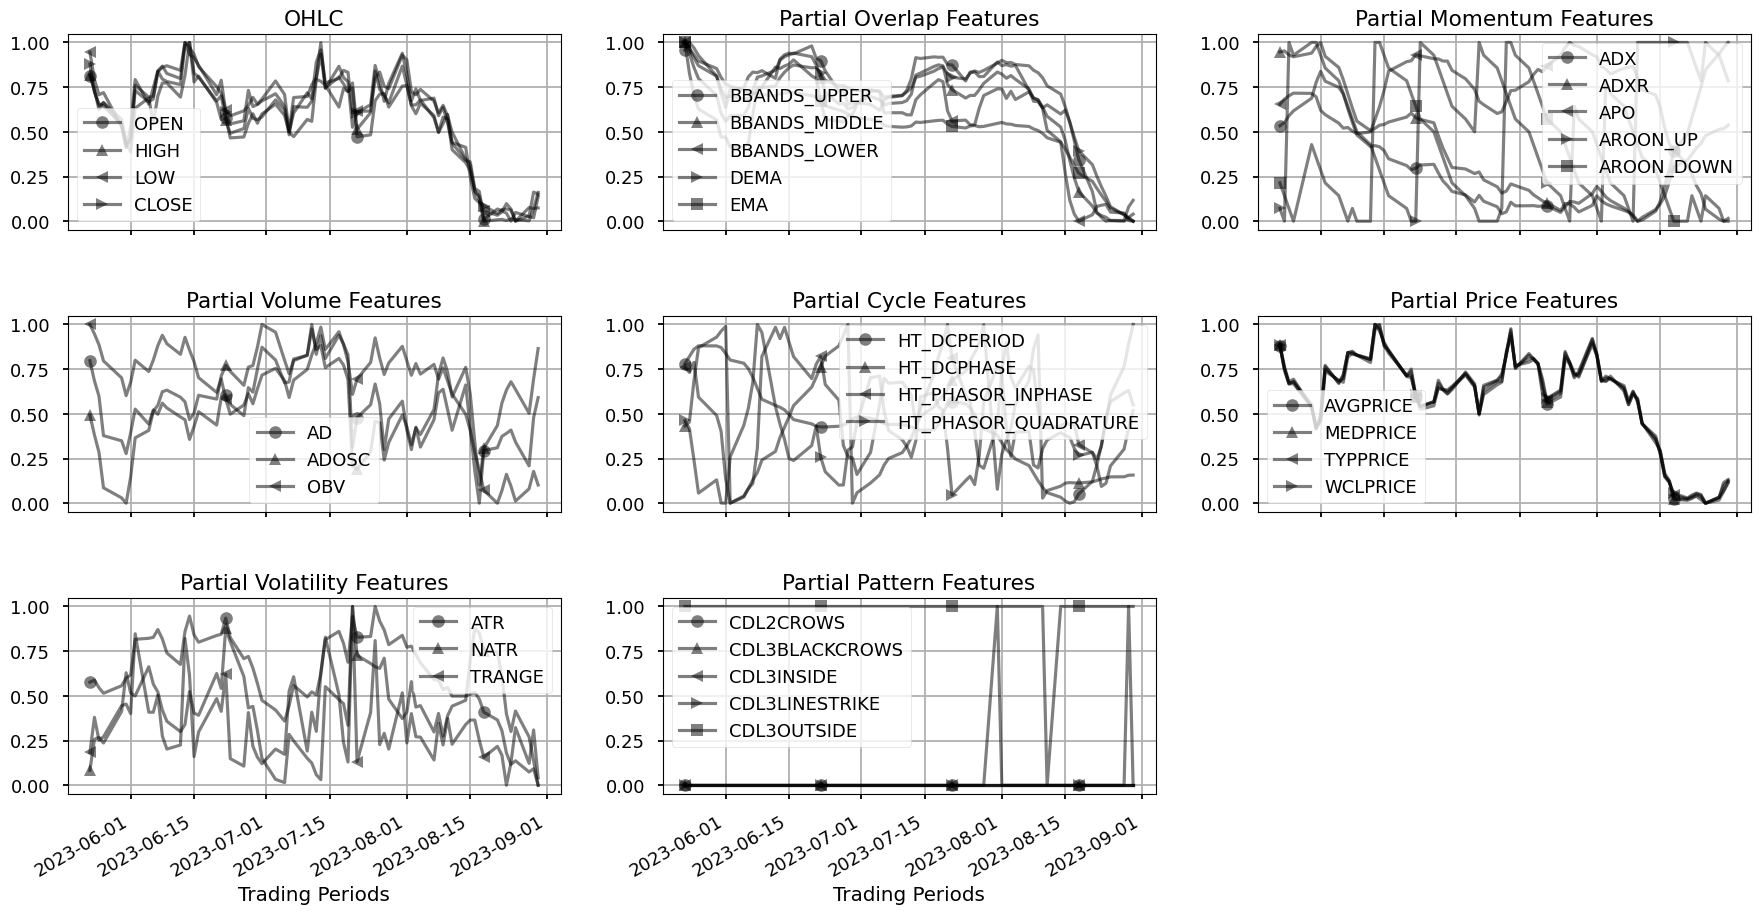

In [17]:
fig, axs = plt.subplots(3, 3, figsize=(18, 10))

# plot the subplot of OHLC
OHLC = ['OPEN', 'HIGH', 'LOW', 'CLOSE']
plot_features(axs[0, 0], OHLC, 'OHLC', train_normalization[OHLC])

# plot the subplot of partial_overlap_features
partial_overlap_features = ['BBANDS_UPPER', 'BBANDS_MIDDLE', 'BBANDS_LOWER', 'DEMA', 'EMA']
plot_features(axs[0, 1], partial_overlap_features, 'Partial Overlap Features', train_normalization[partial_overlap_features])

# plot the subplot of partial_momentum_features
partial_momentum_features = ['ADX', 'ADXR', 'APO', 'AROON_UP', 'AROON_DOWN']
plot_features(axs[0, 2], partial_momentum_features, 'Partial Momentum Features', train_normalization[partial_momentum_features])

# plot the subplot of partial_volume_features
partial_volume_features = ['AD', 'ADOSC', 'OBV']
plot_features(axs[1, 0], partial_volume_features, 'Partial Volume Features', train_normalization[partial_volume_features])

# plot the subplot of partial_cycle_features
partial_cycle_features = ['HT_DCPERIOD', 'HT_DCPHASE', 'HT_PHASOR_INPHASE', 'HT_PHASOR_QUADRATURE']
plot_features(axs[1, 1], partial_cycle_features, 'Partial Cycle Features', train_normalization[partial_cycle_features])

# plot the subplot of partial_price_features
partial_price_features = ['AVGPRICE', 'MEDPRICE', 'TYPPRICE', 'WCLPRICE']
plot_features(axs[1, 2], partial_price_features, 'Partial Price Features', train_normalization[partial_price_features])

# plot the subplot of partial_volatility_features
partial_volatility_features = ['ATR', 'NATR', 'TRANGE']
plot_features(axs[2, 0], partial_volatility_features, 'Partial Volatility Features', train_normalization[partial_volatility_features])

# plot the subplot of partial_pattern_features
partial_pattern_features = ['CDL2CROWS', 'CDL3BLACKCROWS', 'CDL3INSIDE', 'CDL3LINESTRIKE', 'CDL3OUTSIDE']
plot_features(axs[2, 1], partial_pattern_features, 'Partial Pattern Features', train_normalization[partial_pattern_features])

plt.tight_layout()
fig.autofmt_xdate()
fig.delaxes(axs[2, 2])
plt.show()